In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import Counter

In [2]:
games19 = pd.read_csv("mlb_data/2019_games.csv")
atbats19 = pd.read_csv("mlb_data/2019_atbats.csv")
pitches19 = pd.read_csv("mlb_data/2019_pitches.csv")
players = pd.read_csv("mlb_data/player_names.csv")

In [3]:
# This section is to get the name of the pitcher
def pitcher(last_name, first_name):
    pitcher = pd.DataFrame()
    for x in range(len(players)):
        if (players['last_name'][x] == last_name and players['first_name'][x] == first_name) == True:
            pitcher = pitcher.append(pd.DataFrame(players.loc[[x]]))
    pitcher = pitcher.reset_index(drop = True)
    return pitcher

In [4]:
# This has every pitch thrown in every game
def batters_faced(last_name, first_name):
    pitcher_id = pitcher(last_name, first_name)
    pitcher_at_bats = pd.DataFrame()
    for x in range(len(atbats19)):
        if(atbats19['pitcher_id'][x] == pitcher_id['id'][0]) == True:
            pitcher_at_bats = pitcher_at_bats.append(pd.DataFrame(atbats19.loc[[x]]))
    pitcher_at_bats = pitcher_at_bats.reset_index(drop = True)
    return pitcher_at_bats

In [5]:
# Breaksdown the games the pitcher threw in.
def game_summary(last_name, first_name):
    pitcher_at_bats = batters_faced(last_name, first_name)
    pitcher_game_summary = pitcher_at_bats.copy()
    pitcher_game_summary = pitcher_game_summary.drop_duplicates(subset=['g_id'])
    pitcher_game_summary = pitcher_game_summary.reset_index(drop = True)
    return pitcher_game_summary

In [6]:
def pitches_thrown(last_name, first_name):
    count = 0
    count2 = 0
    pitcher_at_bats = batters_faced(last_name, first_name)
    at_bat_stats = pd.DataFrame()
    while count2 < len(pitches19)-1:
        if (count>len(pitcher_at_bats)-1):
            break
        pitch = pitches19['ab_id'][count2]
        bat = pitcher_at_bats['ab_id'][count]
        if (pitch == bat ):
            at_bat_stats = at_bat_stats.append(pitches19.loc[count2])
        if(pitch>bat):
            count+=1
            count2-=1
        count2 +=1
    at_bat_stats = at_bat_stats.reset_index(drop = True)
    return at_bat_stats

In [7]:
# Breakdown of the pitches thrown by a counter
def total_pitches(last_name, first_name):
    at_bat_stats = pitches_thrown(last_name, first_name)
    total_pitches = Counter(at_bat_stats['pitch_type']).most_common()
    return total_pitches

In [8]:
# Return the location of every pitch matched up to the type of pitch it was.
def pitch_type_breakdown(last_name, first_name):
    total_pitches1 = total_pitches(last_name, first_name)
    at_bat_stats1 = pitches_thrown(last_name, first_name)
    pitch_type = []*len(total_pitches1)
    for x in range(len(total_pitches1)):
        if type(total_pitches1[x][0]) == str:
            pitch_type.append([total_pitches1[x][0]])
    for x in range(len(total_pitches1)):
        for k in range(len(at_bat_stats1)):
            location = []
            if (total_pitches1[x][0] == at_bat_stats1['pitch_type'][k]):
                location.append(at_bat_stats1['px'][k])
                location.append(at_bat_stats1['pz'][k])
                location.append(at_bat_stats1['code'][k])
                pitch_type[x].append(location)
    return pitch_type

In [9]:
# balls and strikes for all pitches thrown.
def balls_and_strikes(last_name, first_name):
    stats= pitch_type_breakdown(last_name, first_name)
    color = []
    for x in range(len(stats)):
        long = stats[x][:]
        counter = 1
        while counter < len(long):
            if stats[x][counter][2] == ('B') or stats[x][counter][2] == ('*B') or stats[x][counter][2] == ('H') or stats[x][counter][2] == ('I'):
                stats[x][counter][2] = 'b'
            else:
                stats[x][counter][2] = 'r'
            counter+=1
    return stats

Strike Zone size is about 20in wide 26in tall. about 18.25in off the ground and the top is around 44in off the ground.

In [10]:
# all pitches mapped out
def strikezone_map(last_name, first_name):
    pitch_type = balls_and_strikes(last_name, first_name)
    for x in range(len(pitch_type)):
        test = pitch_type[x][:]
        test.pop([0][0])
        ys = [test[x][0] for x in range(len(test))]
        xs = [test[x][1] for x in range(len(test))]
        color = [test[x][2] for x in range(len(test))]
        plt.scatter(xs,ys, c=color)
        currentAxis = plt.gca()
#         currentAxis.add_patch(Rectangle((-0.8, 1.59), 1.6, 2.15, fill=None, alpha=1)) # Strike Zone
        plt.title(pitch_type[x][0])
    plt.title("Pitch Placement")
    plt.show()   

# each pitch type mapped out
def pitch_breakdown(last_name, first_name):
    pitch_type = balls_and_strikes(last_name, first_name)
    for x in range(len(pitch_type)):
        test = pitch_type[x][:]
        test.pop([0][0])
        ys = [test[x][0] for x in range(len(test))]
        xs = [test[x][1] for x in range(len(test))]
        color = [test[x][2] for x in range(len(test))]
        plt.scatter(xs,ys, c=color)
        currentAxis = plt.gca()
#         currentAxis.add_patch(Rectangle((-0.8, 1.59), 1.6, 2.15, fill=None, alpha=1)) # Strike Zone
        plt.title(pitch_type[x][0])
        plt.show()

In [11]:
def main(last_name, first_name):
    strikezone_map(last_name, first_name)
    pitch_breakdown(last_name, first_name)

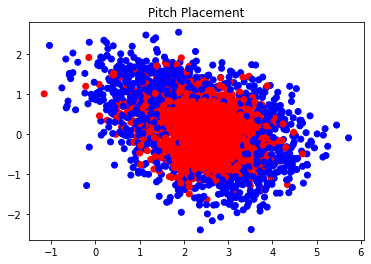

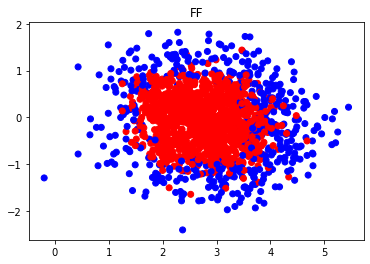

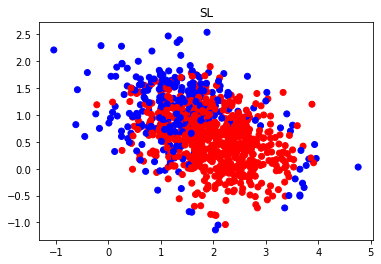

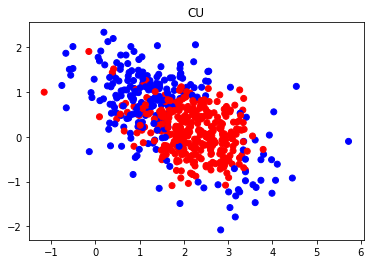

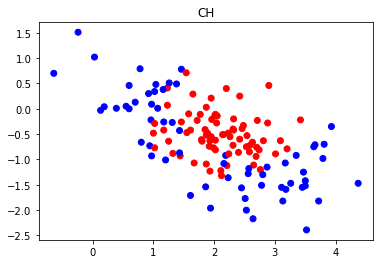

In [12]:
main("Verlander","Justin")